In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

CACHE_DIR = Path(Path(os.getenv('APP_DIR')), '.cache')
NANOHUB_CACHE = Path(CACHE_DIR, 'nanohub')
NANOHUB_METRICS_CACHE = Path(CACHE_DIR, 'nanohub_metrics')


def create_silhouette_visual(sample, kmeans: KMeans, clusters: list = [2,3,4,5]):
    fig, ax = plt.subplots(2, 2, figsize=(15,8))
    for i in clusters:
        q, mod = divmod(i, 2)

        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(sample)
        
        
def display_cluster_info(X_scaled, clusters: [] = [2,3,4,5,6,7,8,9,10]):
    km_scores= []
    km_silhouette = []
    vmeasure_score =[]
    db_score = []
    
    fig, ax = plt.subplots(5, 2, figsize=(15,8))

    for i in clusters:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X_scaled)
        preds = kmeans.predict(X_scaled)
        km_scores.append(-kmeans.score(X_scaled))
        print("Score for number of cluster(s) {}: {}".format(i,kmeans.score(X_scaled)))
        km_scores.append(-kmeans.score(X_scaled))

        silhouette = silhouette_score(X_scaled,preds)
        km_silhouette.append(silhouette)
        print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

        db = davies_bouldin_score(X_scaled,preds)
        db_score.append(db)
        print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

        display("Centroids - ")
        print(kmeans.cluster_centers_)
        
        q, mod = divmod(i, 2)
    
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(X_scaled)

        print("-"*100) 



In [2]:
df = pd.read_csv(
    Path(CACHE_DIR, 'unclassified_user_data.csv'),
    index_col=False
)

In [3]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [4]:
monetary_df = df[['user', 'job_count']].copy()
monetary_df['Monetary'] = monetary_df['job_count']

users = pd.merge(users, monetary_df, on='user')

In [5]:

kmeans = KMeans(n_clusters=8)
kmeans.fit(users[['Monetary']])
users['MonetaryCluster'] = kmeans.predict(users[['Monetary']])

In [6]:
display(users.groupby('MonetaryCluster')['job_count'].describe())

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,36019.0,3.308406e+02,1141.794981,2.0,10.0,25.0,95.0,11869.0
1,1.0,8.942496e+06,NaN,8942496.0,8942496.0,8942496.0,8942496.0,8942496.0
2,3.0,1.292057e+06,78821.036052,1201055.0,1268639.5,1336224.0,1337557.5,1338891.0
3,7.0,5.032369e+05,103539.557393,408693.0,447209.5,456760.0,535614.5,691557.0
4,33.0,1.128230e+05,27871.140140,70478.0,84326.0,118089.0,134210.0,170888.0
5,11.0,2.614315e+05,49594.404840,203289.0,229217.0,242015.0,283512.0,361523.0
6,463.0,2.345838e+04,11482.748141,11970.0,14945.0,19115.0,28594.5,65359.0
7,1.0,1.585184e+06,NaN,1585184.0,1585184.0,1585184.0,1585184.0,1585184.0


In [7]:
users.to_csv(
    Path(CACHE_DIR, "monetary.csv"),
    index=False,
    index_label=False
)

In [8]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Monetary']])

Score for number of cluster(s) 2: -0.13653138165288012
Silhouette score for number of cluster(s) 2: 0.9997457019946906
Davies Bouldin score for number of cluster(s) 2: 0.0001977298740985461


'Centroids - '

[[1.17183604e-04]
 [1.00000000e+00]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -0.04199651837308777
Silhouette score for number of cluster(s) 3: 0.998501369756072
Davies Bouldin score for number of cluster(s) 3: 0.13391592436374705


'Centroids - '

[[9.83654147e-05]
 [1.00000000e+00]
 [1.37610403e-01]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -0.015108412961479235
Silhouette score for number of cluster(s) 4: 0.9957013134801992
Davies Bouldin score for number of cluster(s) 4: 0.2240664159429704


'Centroids - '

[[8.09343359e-05]
 [1.00000000e+00]
 [1.52679610e-01]
 [3.97500903e-02]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -0.00856090976041935
Silhouette score for number of cluster(s) 5: 0.9909895236798973
Davies Bouldin score for number of cluster(s) 5: 0.268529485184249


'Centroids - '

[[7.06923783e-05]
 [1.00000000e+00]
 [1.52679610e-01]
 [5.23205023e-02]
 [1.67724750e-02]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -0.0052153924511814794
Silhouette score for number of cluster(s) 6: 0.9668304747801251
Davies Bouldin score for number of cluster(s) 6: 0.32163632376723866


'Centroids - '

[[3.93911884e-05]
 [1.00000000e+00]
 [1.52679610e-01]
 [5.23205023e-02]
 [1.84304401e-02]
 [3.01108443e-03]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -0.0037329836933726094
Silhouette score for number of cluster(s) 7: 0.964453118697194
Davies Bouldin score for number of cluster(s) 7: 0.35685132541326203


'Centroids - '

[[3.68817198e-05]
 [1.00000000e+00]
 [1.52679610e-01]
 [2.92345229e-02]
 [1.26162825e-02]
 [2.63136227e-03]
 [5.62745535e-02]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -0.0029270966761482525
Silhouette score for number of cluster(s) 8: 0.9644251062600329
Davies Bouldin score for number of cluster(s) 8: 0.33548364552290344


'Centroids - '

[[3.67728046e-05]
 [1.00000000e+00]
 [1.44484823e-01]
 [2.92345229e-02]
 [1.26162825e-02]
 [5.62745535e-02]
 [1.77263971e-01]
 [2.62302442e-03]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -0.002131292174464338
Silhouette score for number of cluster(s) 9: 0.9643720093903586
Davies Bouldin score for number of cluster(s) 9: 0.30441909203345874


'Centroids - '

[[3.65939382e-05]
 [1.00000000e+00]
 [1.44484823e-01]
 [4.82460113e-02]
 [2.81152439e-02]
 [2.60915783e-03]
 [7.24365596e-02]
 [1.77263971e-01]
 [1.26162825e-02]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -0.001337301835321352
Silhouette score for number of cluster(s) 10: 0.9501757344416372
Davies Bouldin score for number of cluster(s) 10: 0.3253304556072722


'Centroids - '

[[2.53803934e-05]
 [1.00000000e+00]
 [1.44484823e-01]
 [4.82460113e-02]
 [1.36002204e-02]
 [4.34809408e-03]
 [7.24365596e-02]
 [1.33119117e-03]
 [2.81152439e-02]
 [1.77263971e-01]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


----------------------------------------------------------------------------------------------------


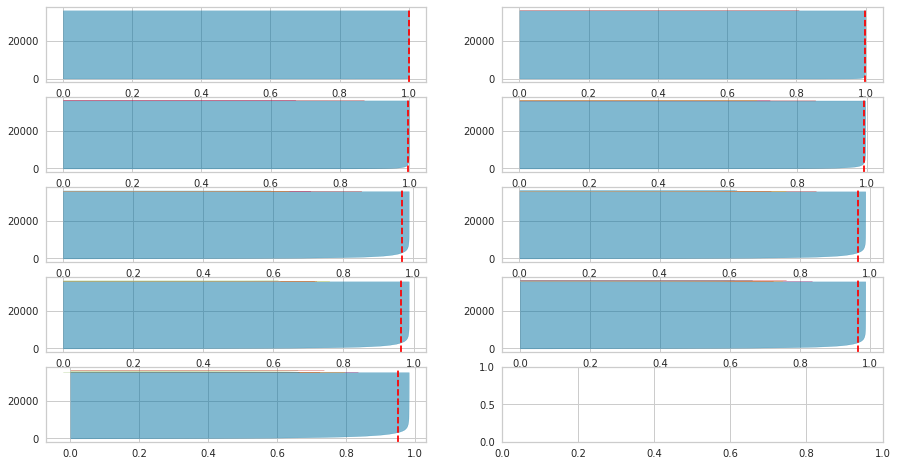

In [9]:
display_cluster_info(X_scaled)